In [1]:
using Revise
using BiMDPs

[ Info: Precompiling BiMDPs [8af17bd5-7ea0-4ae2-8fd5-dbf3cdd18bce]


In [15]:
rgw = RoverXYTWorld.RoverXYTWorldMDP(
    grid_size = (10,10),
    max_time = 20,
    reward_vals = Dict(1=>((9,2),50),
                        2=>((9,8),50)),
    exit_xys = []
)

BiMDPs.RoverXYTWorld.RoverXYTWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  reward_vals: Dict{Int64, Tuple{Tuple{Int64, Int64}, Float64}}
  exit_xys: Array{Tuple{Int64, Int64}}((0,))


## Plot rewards grid

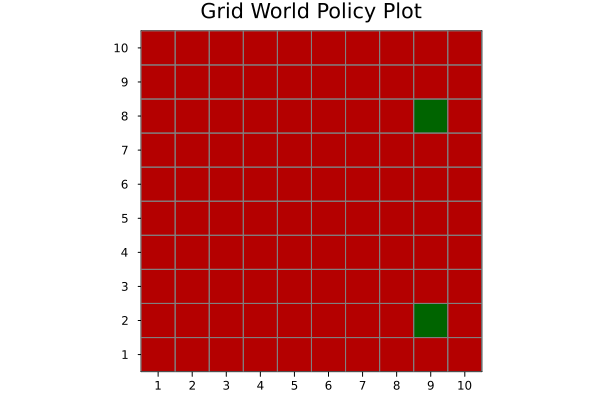

In [16]:
RoverXYTWorld.plot_grid_world(rgw)

## Run tests

In [17]:
# Check state indices
RoverXYTWorld.test_state_indexing(rgw)

## Solving

In [18]:
@time policy = RoverXYTWorld.solve_using("vi", rgw, vi_max_iterations = 500);

  0.474972 seconds (9.23 M allocations: 687.602 MiB, 20.86% gc time, 1.25% compilation time)


In [27]:
@time q_learning_policy = RoverXYTWorld.solve_using("qlearning", rgw, q_n_episodes=50000);

  2.659093 seconds (53.82 M allocations: 3.892 GiB, 15.62% gc time)


In [31]:
@time sarsa_policy = RoverXYTWorld.solve_using("sarsa", rgw, sarsa_n_episodes=50000);

  2.440733 seconds (52.87 M allocations: 3.833 GiB, 15.82% gc time)


## Compare different policies

In [32]:
results = RoverXYTWorld.run_simulation(rgw, policy, q_learning_policy, sarsa_policy; N_sim = 500);

N_sim = 500
window = 166


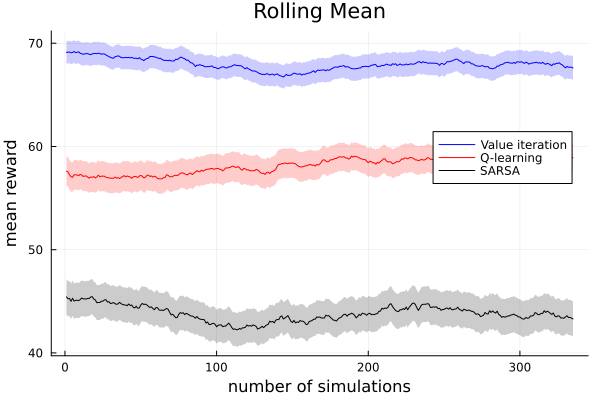

In [33]:
RoverGridWorld.plot_simulation_results(results)

## Get undiscounted rewards

In [34]:
rgw_nodisc = RoverXYTWorld.modify_γ(rgw, γ=1.0)

BiMDPs.RoverXYTWorld.RoverXYTWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 1.0
  reward_vals: Dict{Int64, Tuple{Tuple{Int64, Int64}, Float64}}
  exit_xys: Array{Tuple{Int64, Int64}}((0,))


In [35]:
results = RoverXYTWorld.run_simulation(rgw_nodisc, policy, q_learning_policy, sarsa_policy; N_sim = 500);

N_sim = 500
window = 166


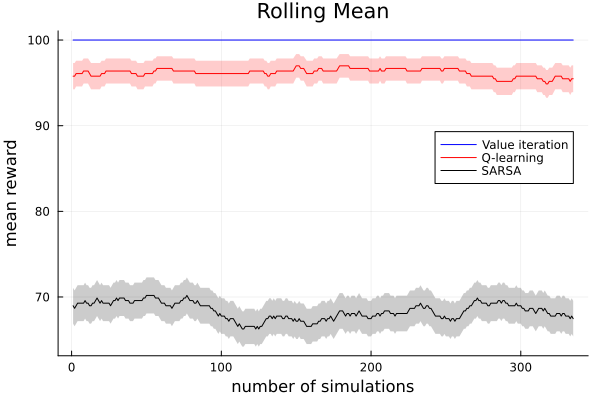

In [36]:
RoverGridWorld.plot_simulation_results(results)

## Solving using Value Iteration

In [63]:
using POMDPs
using DiscreteValueIteration

In [64]:
using Interact, Plots
# Interact.WebIO.install_jupyter_nbextension() # might be helpful if you see `WebIO` warnings in Jupyter
@manipulate for iter in slider(0:10:500, value = 0)
    solver = ValueIterationSolver(max_iterations=iter);
    policy = POMDPs.solve(solver, rgw);
    RoverXYTWorld.plot_grid_world(rgw, policy, iter, rgw.γ)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00000234015a4f90, Task (runnable) @0x00000234015a4f90), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 140730173489408, 2422744508064)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"10\",\"20\",\"30\",\"40\",\"50\",\"60\",\"70\",\"80\"

## View stepthrough of one policy

In [40]:
s0 = RoverXYTWorld.State(3,4,1,fill(false, length(rgw.reward_vals)))
steps = RoverXYTWorld.collect_stepthrough(rgw, policy, init_state = s0)
file_path = RoverXYTWorld.create_simulated_episode_gif(rgw, policy, steps, fname="gridworld_timed")

"gifs/gridworld_timed.gif"

In [9]:
steps[end]

(s = BiMDPs.RoverXYTWorld.State(9, 10, 20, Bool[1, 1]), a = BiMDPs.RoverXYTWorld.UP, r = 0)

In [10]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 100.0.
